In [11]:
from pathlib import Path
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import soundfile as sf
import pandas as pd

import os 
import itertools
import re
import math
import csv
import random
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from scipy.fftpack import fftn, ifftn, fft, ifft
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import signal
import pickle
from sklearn.metrics import plot_confusion_matrix
from sklearn.externals import joblib
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import confusion_matrix
import warnings

warnings.filterwarnings('ignore') 
#df = pd.read_csv("allEmgData10to200hz_withAudible_6Channel.csv")
#df = pd.read_csv("allEmgData10to200hz_withAudible_6Channel.csv")
#df = pd.read_csv("allEmgData_withAudible.csv")
df = pd.read_csv("allEmgData10to200hz_noAudible.csv")
df
#dfs = df[(df.sessionID == 4002)]
#dfs

,channel_1_mav,channel_1_mav2,channel_1_rms,channel_1_iav,channel_1_ssi,channel_1_var,channel_1_wl,channel_1_iemg,channel_1_aac,channel_1_zc,...,channel_7_aac,channel_7_zc,channel_7_ssc,channel_7_wamp,channel_7_medf,channel_7_meanf,userID,sessionID,uttID,modeID
0,0.034982,0.034978,0.047836,117.153433,7.663511,0.002288,131.601251,117.153433,0.039296,1239,...,1.934334e-07,122,143,0,41.441441,53.265246,1,1001,10010001,audible
1,0.028157,0.027672,0.040353,63.465079,3.670272,0.001628,71.151924,63.465079,0.031567,861,...,2.722643e-07,77,97,0,38.839286,51.119716,1,1001,10010002,audible
2,0.035103,0.034888,0.049304,142.411421,9.862262,0.002431,160.962810,142.411421,0.039675,1552,...,1.546840e-07,150,169,0,43.811881,58.339405,1,1001,10010003,audible
3,0.032311,0.032216,0.044599,134.576651,8.284614,0.001989,151.073407,134.576651,0.036272,1551,...,1.484281e-07,154,180,0,38.313253,51.176996,1,1001,10010004,audible
4,0.030766,0.030463,0.044142,144.633076,9.159818,0.001948,161.532869,144.633076,0.034361,1743,...,1.378023e-07,179,203,0,40.938166,53.242317,1,1001,10010005,audible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7374,0.035106,0.034781,0.049159,65.542070,4.511806,0.002417,70.545085,65.542070,0.037785,660,...,3.448719e-07,60,78,0,40.540541,53.279534,8,8101,81010506,audible
7375,0.033092,0.032411,0.046681,64.628148,4.255896,0.002179,69.438232,64.628148,0.035555,698,...,3.291769e-07,71,91,0,40.206186,53.210031,8,8101,81010507,audible
7376,0.033499,0.033424,0.050080,56.780836,4.251053,0.002508,61.153328,56.780836,0.036079,622,...,3.720769e-07,61,75,0,41.071429,55.041519,8,8101,81010508,audible
7377,0.036185,0.036171,0.052843,70.705897,5.456400,0.002792,75.374112,70.705897,0.038574,662,...,3.312040e-07,67,77,0,40.206186,53.089233,8,8101,81010509,audible


In [12]:
def split_data_per_session(session_id):
    temp_df = df[(df.sessionID == session_id)]
    data = temp_df.copy()
    data = shuffle(data)
    y = data['modeID']
    data.drop(labels=['userID','uttID', 'sessionID','modeID'], axis=1, inplace=True)
    return train_test_split(data, y, test_size=0.2)

def split_data_session(train_user_ids,test_user_ids):
    temp_df = df
    data = temp_df.copy()
    train_df = data.loc[data['sessionID'].isin(train_user_ids)]
    test_df = data.loc[data['sessionID'].isin(test_user_ids)]
    X_train = train_df.copy()
    X_test = test_df.copy()
    y_train = X_train['userID']
    y_test = X_test['userID']
    X_train.drop(labels=['userID','uttID', 'sessionID','modeID'], axis=1, inplace=True)
    X_test.drop(labels=['userID','uttID', 'sessionID','modeID'], axis=1, inplace=True)
    return X_train, X_test, y_train, y_test 


In [13]:
from sklearn.metrics import ConfusionMatrixDisplay
def lda():
    ids = [1001,1002,1003,2001,2002,2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,
        2023,2024,2025,2026,2027,2028, 2029, 2030,2031, 2032,2101,8001,8002,8003,8004,8005,8006,8007,8008,8009, 8010, 8011,8012,8013,8014,8015, 8016, 8017, 8018,8019, 8101]
    scores = np.array([])
    y_pred = []
    y_actu = []
    labels = []
    for x in range (len(ids)):
        test_ids = []
        train_ids = []
        test_ids = ids[x:x+1]
        train_ids = np.delete(ids,x)
        #print (test_ids)
        X_train, X_test, y_train, y_test = split_data_session(train_ids,test_ids)
        k_clf = LinearDiscriminantAnalysis()
        k_clf.fit(X_train, y_train)
        score = k_clf.score(X_test, y_test)
        sscore = np.array([score])
        scores = np.concatenate([scores,sscore],axis=0)
        #print(y_test)
        print("G for session " + str(test_ids) +" is "+str(score))
        #a=np.unique(k_clf.predict(X_test))
        #b=k_clf.predict(X_test)
        #labels = np.concatenate((labels,a))
        #y_pred =np.concatenate((y_pred, b))
        #y_actu =np.concatenate((y_actu, y_test))
        #plot_confusion_matrix(k_clf, X_test, y_test,display_labels=a,normalize='true')  # doctest: +SKIP
        #plt.title("Unfiltered Session "+str(ids[x]))
        #plt.savefig(os.path.join("Session "+str(ids[x])+ "_without29.png"), dpi=600, format='png', bbox_inches='tight') 
        #plt.show()  # doctest: +SKIP
    #label = np.unique(labels)
    #label =[1, 2, 4, 7, 8,]
    #a = confusion_matrix(y_actu, y_pred, labels=label,normalize='true')
    #plt.figure()
    #cm_display = ConfusionMatrixDisplay(a,display_labels=label).plot()
    #plt.title("User Identity")
    #plt.savefig(os.path.join("AllUserConfMatUnf_without29.png"), dpi=600, format='png', bbox_inches='tight')
    #plot_confusion_matrix(a, display_labels=label, normalize=True)
    #plt.show()
    print ("Durchschnitt: ")
    print((scores.mean()))
    print(scores.std())
    #print(label)

In [14]:
lda()


G for session [1001] is 0.6533333333333333
G for session [1002] is 0.84
G for session [1003] is 1.0
G for session [2001] is 1.0
G for session [2002] is 1.0
G for session [2003] is 1.0
G for session [2004] is 1.0
G for session [2005] is 1.0
G for session [2006] is 1.0
G for session [2007] is 1.0
G for session [2008] is 1.0
G for session [2009] is 1.0
G for session [2010] is 1.0
G for session [2011] is 1.0
G for session [2012] is 1.0
G for session [2013] is 1.0
G for session [2014] is 1.0
G for session [2015] is 0.98
G for session [2016] is 1.0
G for session [2017] is 1.0
G for session [2018] is 1.0
G for session [2019] is 1.0
G for session [2020] is 1.0
G for session [2021] is 1.0
G for session [2022] is 1.0
G for session [2023] is 1.0
G for session [2024] is 1.0
G for session [2025] is 1.0
G for session [2026] is 0.55
G for session [2027] is 1.0
G for session [2028] is 1.0
G for session [2029] is 0.36666666666666664
G for session [2030] is 1.0
G for session [2031] is 1.0
G for session 

In [18]:
def lda_user4_session2():
    train_ids = [1001,1002,1003,2001,2002,2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,2011, 2012, 2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,
        2023,2024,2025,2026,2027,2028, 2030,2031, 2032,2101,4001,4002,7001,7002,8001,8002,8003,8004,8005,8006,8007,8008,8009, 8010, 8011,8012,8013,8014,8015, 8016, 8017, 8018,8019, 8101]
    test_ids =[]
    X_train, X_test, y_train, y_test = split_data_session(train_ids,test_ids)
    k_clf = LinearDiscriminantAnalysis()
    k_clf.fit(X_train, y_train)
    score = k_clf.score(X_test, y_test)
    print("Accuracy for session 2 is "+str(score))
    a=np.unique(k_clf.predict(X_test))
    plot_confusion_matrix(k_clf, X_test, y_test,display_labels=a,normalize='true')  # doctest: +SKIP
    plt.title("Session "+str(test_ids[0]))
    #plt.savefig(os.path.join("Session "+str(test_ids[0])+".png"), dpi=600, format='png', bbox_inches='tight')
    plt.show()
    return score 

[[ 442    4    0    0    4]
 [   0 3539    0   32  149]
 [  85    0  150    2   63]
 [   0  152    0    1  147]
 [   0    2    0    1 2156]]


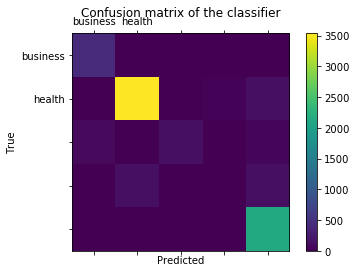

In [23]:
#abels = ['business', 'health']
#cm = confusion_matrix(y_test, pred, labels)
print(a)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(a)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()